In [1]:
df = read.csv('census_income.csv')

In [3]:
head(df,3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


PAIRED - T-test

In [4]:
t.test(df$capital.gain,df$capital.loss,paired = TRUE)


	Paired t-test

data:  df$capital.gain and df$capital.loss
t = 24.12, df = 32560, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  909.8676 1070.8225
sample estimates:
mean of the differences 
                990.345 


p value is very small hence we reject null hypothesis and accept alternative hypothesis: true difference in means is not equal to 0

FIND OIT IF THE HOURS PER WEEK ARE SIGNIFICANTLY DIFFERENT ACROSS GENDERS, INCOME LEVELS 

WE USE THE UMPAIRED T TEST

We should findout if the variance are different first to apply the appropriate test

In [10]:
var.test(df$hours.per.week[df$sex == ' Female'], df$hours.per.week[df$sex ==  ' Male'])
var.test(df$hours.per.week[df$Y == ' <=50K'], df$hours.per.week[df$Y  !=  ' <=50K'])


	F test to compare two variances

data:  df$hours.per.week[df$sex == " Female"] and df$hours.per.week[df$sex == " Male"]
F = 0.94975, num df = 10770, denom df = 21789, p-value = 0.002041
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9193215 0.9813577
sample estimates:
ratio of variances 
         0.9497464 



	F test to compare two variances

data:  df$hours.per.week[df$Y == " <=50K"] and df$hours.per.week[df$Y != " <=50K"]
F = 1.2512, num df = 24719, denom df = 7840, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.206880 1.296796
sample estimates:
ratio of variances 
          1.251243 


p-value = 0.002041 Between Male and Female in terms of hours per week hence true ratio of variances is notequal to 1


p-value < 2.2e-16 <=50k hence true ratio of variances is not equal to 1

LETS NOW PERFOM THE T-TEST

In [11]:
t.test(df$hours.per.week~df$sex, paired = FALSE, var.equal=FALSE)


	Welch Two Sample t-test

data:  df$hours.per.week by df$sex
t = -42.882, df = 21958, p-value < 2.2e-16
alternative hypothesis: true difference in means between group  Female and group  Male is not equal to 0
95 percent confidence interval:
 -6.292787 -5.742664
sample estimates:
mean in group  Female   mean in group  Male 
             36.41036              42.42809 


p-value < 2.2e-16


alternative hypothesis: true difference in means between group 


Female and group  Male is not equal to 0

In [12]:
t.test(df$hours.per.week~df$Y, paired = FALSE, var.equal=FALSE)


	Welch Two Sample t-test

data:  df$hours.per.week by df$Y
t = -45.123, df = 14570, p-value < 2.2e-16
alternative hypothesis: true difference in means between group  <=50K and group  >50K is not equal to 0
95 percent confidence interval:
 -6.920943 -6.344690
sample estimates:
mean in group  <=50K  mean in group  >50K 
            38.84021             45.47303 


p-value < 2.2e-16


alternative hypothesis: true difference in means between group  <=50K and group  >50K is not equal to 0

---------------------------------------------------------------END--------------------------------------------------------------

EXAMINE TO SEE WETHER EDUCATIONAL CLASSES ARE SIGNIFICANTLT DIFFERENT ACROSS DIFERENT WORK CLASSES

ALSO REPORT WHICH CLASS HAVE EDUCATIONAL LEVELS SIGNIFICANTLY HIGHER OR LOWER IN COMPARISON TO OTHERS USING AN ADDITIONAL TEST

USE THE ANOVA T TEST

In [13]:
head(df,2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [14]:
anova_model = aov(education.num~workclass, data=df )

In [15]:
summary(anova_model)

               Df Sum Sq Mean Sq F value Pr(>F)    
workclass       8   8393  1049.1   164.9 <2e-16 ***
Residuals   32552 207118     6.4                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

p value = <2e-16 *** meaning there are differences hence we use Turkey HSD to test which one are different

In [17]:
# Perform Tukey's HSD test
tukey_result <- TukeyHSD(anova_model)

In [18]:
# Print the Tukey results
print(tukey_result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = education.num ~ workclass, data = df)

$workclass
                                       diff         lwr         upr     p adj
 Federal-gov- ?                  1.71360975  1.40199309  2.02522641 0.0000000
 Local-gov- ?                    1.78169633  1.53152122  2.03187144 0.0000000
 Never-worked- ?                -1.83177716 -4.79457041  1.13101609 0.6013740
 Private- ?                      0.61936590  0.42952949  0.80920231 0.0000000
 Self-emp-inc- ?                 1.87674819  1.57977737  2.17371901 0.0000000
 Self-emp-not-inc- ?             0.96594028  0.72629237  1.20558819 0.0000000
 State-gov- ?                    2.11561444  1.83188797  2.39934090 0.0000000
 Without-pay- ?                 -0.18892001 -2.28790603  1.91006600 0.9999989
 Local-gov- Federal-gov          0.06808658 -0.23689051  0.37306366 0.9988917
 Never-worked- Federal-gov      -3.54538690 -6.51330996 -0.57746385 0.00655

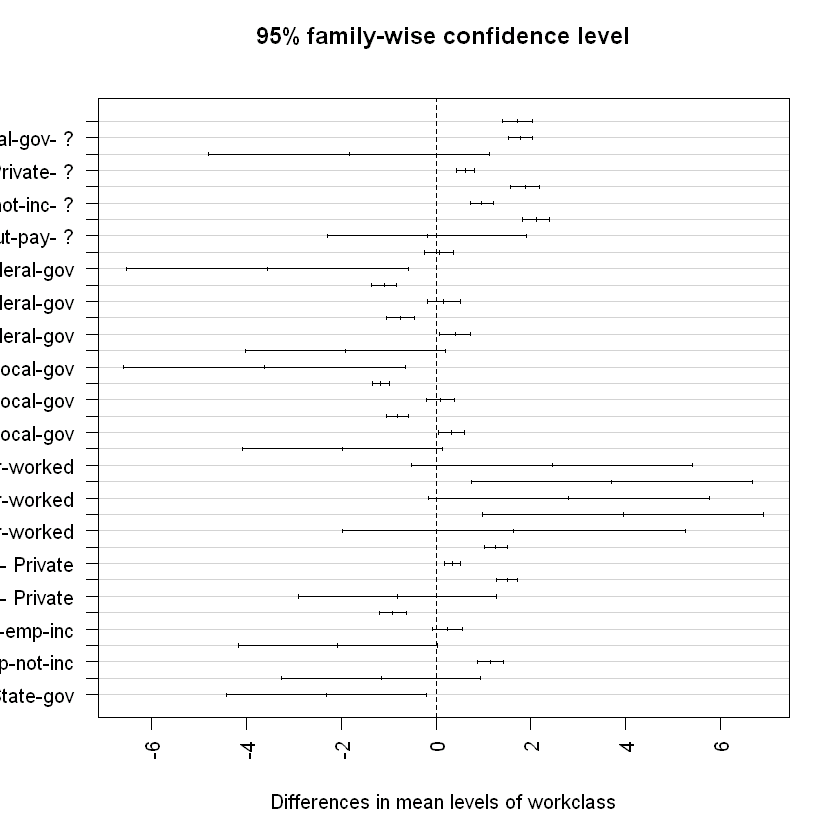

In [19]:
# Visualizing the Tukey HSD results
plot(tukey_result, las = 2)

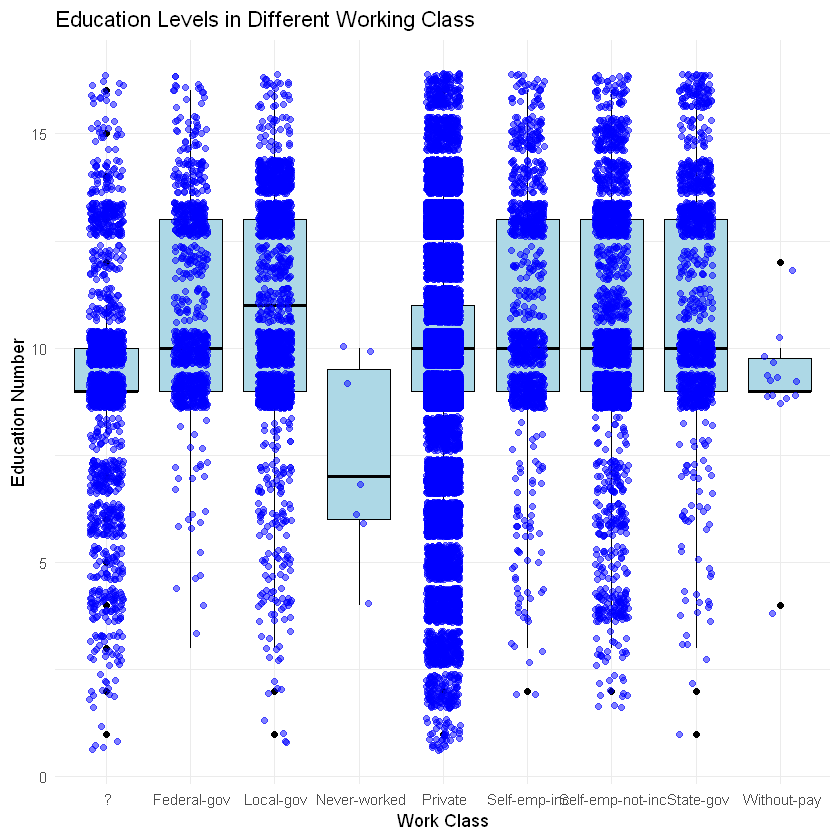

In [20]:
# Boxplot to visualize differences
library(ggplot2)
ggplot(df, aes(x = workclass, y = education.num )) +
  geom_boxplot(fill = "lightblue", color = "black") +
  geom_jitter(width = 0.2, alpha = 0.5, color = "blue") +
  theme_minimal() +
  labs(title = "Education Levels in Different Working Class", x = "Work Class", y = "Education Number")


In [21]:
# Pairwise t-test with Bonferroni correction
pairwise.t.test(df$education.num, df$workclass, p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  df$education.num and df$workclass 

                   ?       Federal-gov  Local-gov  Never-worked  Private
 Federal-gov      < 2e-16 -            -          -             -       
 Local-gov        < 2e-16 1.0000       -          -             -       
 Never-worked     1.0000  0.0076       0.0056     -             -       
 Private          < 2e-16 < 2e-16      < 2e-16    0.3657        -       
 Self-emp-inc     < 2e-16 1.0000       1.0000     0.0038        < 2e-16 
 Self-emp-not-inc < 2e-16 1.9e-13      < 2e-16    0.1219        1.9e-09 
 State-gov        < 2e-16 0.0065       0.0065     0.0013        < 2e-16 
 Without-pay      1.0000  0.1831       0.1288     1.0000        1.0000  
                   Self-emp-inc  Self-emp-not-inc  State-gov
 Federal-gov      -             -                 -         
 Local-gov        -             -                 -         
 Never-worked     -             -                 -         
 P

CHISQUARE TEST

FIND IF THE INCOME RATE IS AFFECTED BY RACE : IS THERE A RELATIONSHIP BETWEEN INCOME LEVELS AND RACE

In [23]:
chisq.test(df$race, df$Y)


	Pearson's Chi-squared test

data:  df$race and df$Y
X-squared = 330.92, df = 4, p-value < 2.2e-16


p-value < 2.2e-16 Reject Null hypothesis Race does not affect the income level